In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#Load Dataset
filename = "all_label.txt"
location_relative_path = f"../data/raw/news_headlines/all/{filename}"
new_location_relative_path = f"../data/processed/cleaned"
df = pd.read_csv(location_relative_path, sep="|")


In [3]:
#Initial Inspection
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3096 entries, 0 to 3095
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          3096 non-null   object
 1   manipulative  3096 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 48.5+ KB
None
                                                text  manipulative
0   $200,000 worth of supplies donated to PB schools             0
1              10-year-old shoot mom over VR headset             0
2  14 killed in prison clashes in Ecuador as some...             0
3                    2025 The New York Times Company             0
4  23-year-old charged with murder in NH country ...             0


manipulative
1    1553
0    1543
Name: count, dtype: int64


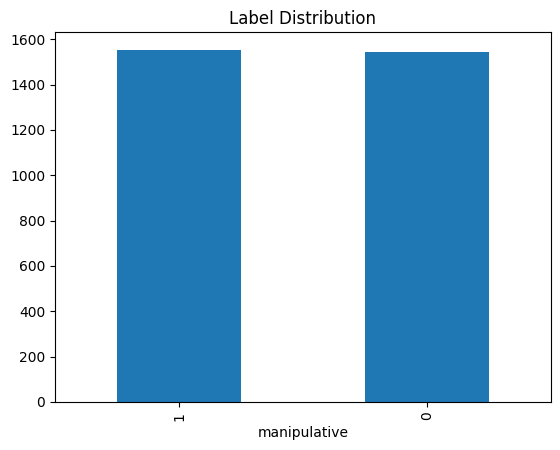

In [4]:
#Label Distribution
print(df['manipulative'].value_counts())
df['manipulative'].value_counts().plot(kind='bar', title='Label Distribution')
plt.show()

In [5]:
#Text length Stats
df['text_length'] = df['text'].apply(len)
print(df['text_length'].describe())

count    3096.000000
mean       62.489664
std        18.729860
min        10.000000
25%        52.000000
50%        62.000000
75%        71.000000
max       257.000000
Name: text_length, dtype: float64


In [6]:
# Count missing values in each column
print("Missing values:")
print(df[['text', 'manipulative']].isnull().sum())

# Show rows with missing values
print("\nRows with missing values:")
print(df[df[['text', 'manipulative']].isnull().any(axis=1)])


Missing values:
text            0
manipulative    0
dtype: int64

Rows with missing values:
Empty DataFrame
Columns: [text, manipulative, text_length]
Index: []


In [7]:
# Count duplicate rows based on 'text'
duplicate_count = df.duplicated(subset='text').sum()
print(f"\nDuplicate rows based on 'text': {duplicate_count}")

# Show duplicate rows sorted by text
print("\nDuplicate entries (sorted by text):")
duplicates_sorted = df[df.duplicated(subset='text', keep=False)].sort_values(by='text')
print(duplicates_sorted)



Duplicate rows based on 'text': 4

Duplicate entries (sorted by text):
                                                   text  manipulative  \
126   As Trump plans autism announcement, Tylenol ma...             0   
1666  As Trump plans autism announcement, Tylenol ma...             1   
467   Everest record, off-duty lifesaver and a rescu...             0   
1987  Everest record, off-duty lifesaver and a rescu...             1   
898   Man charged with murder in killing of teen Tik...             0   
2451  Man charged with murder in killing of teen Tik...             1   
936   Meta's AI glasses could mean more independence...             0   
2486  Meta's AI glasses could mean more independence...             1   

      text_length  
126            79  
1666           79  
467            56  
1987           56  
898            54  
2451           54  
936            70  
2486           70  


In [8]:
clean_relative_path = f"../data/processed/cleaned/{filename}"

#Drop rows with missing data
df.dropna(subset=['text', 'manipulative'], inplace=True)

#Drop Duplicate rows
df.drop_duplicates(subset='text', inplace=True)

#Save CSV File
df[['text', 'manipulative']].to_csv(clean_relative_path, index=False, sep="|")